In [3]:
import glob
import os

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

rc = {"font.family": "serif",
      "mathtext.fontset": "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

plt.rcParams.update({'font.size': 18, 'axes.labelsize': 18})

from pylisst import utils


opj = os.path.join

In [4]:
idir = '/DATA/projet/gernez/hablab/lisst_vsf/L2'
files=glob.glob(opj(idir,'*.nc'))

In [5]:
p=[]
for file in files:
    basename = os.path.basename(file)
    info = basename.split('_')
    if info[0].__contains__('MilliQ'):
        continue
    if info[0].__contains__('BEADS'):
        continue
    p.append(xr.open_dataset(file).drop('pmt').expand_dims(['name','type','number']).set_coords(['name','type','number']))


xarr = xr.combine_by_coords(p)
xarr

<xarray.Dataset>
Dimensions:  (name: 6, set: 100, config: 2, angles: 175, type: 2, number: 3)
Coordinates:
  * name     (name) <U3 'HET' 'LIN' 'MES' 'PRO' 'PRY' 'TEL'
  * set      (set) int64 0 1 2 3 4 5 6 7 8 9 ... 90 91 92 93 94 95 96 97 98 99
  * config   (config) int64 0 1
  * angles   (angles) float64 0.08803 0.1039 0.1226 0.1447 ... 154.0 155.0 156.0
  * type     (type) <U1 'F' 'S'
  * number   (number) <U2 'C1' 'C2' 'C3'
Data variables:
    beam_c   (name, type, number, set, config) float64 nan nan ... 0.9944 1.102
    P11      (name, type, number, set, angles) float64 nan nan ... 0.001589
    p12      (name, type, number, set, angles) float64 nan nan ... -0.1099
    p22      (name, type, number, set, angles) float64 nan nan ... 0.8661 0.9183

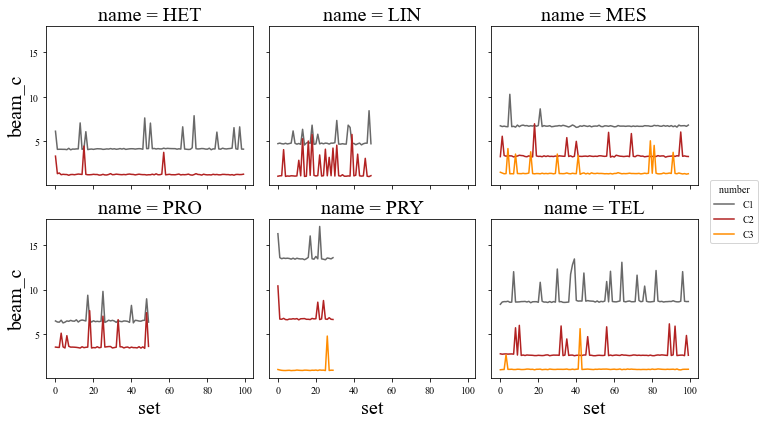

In [10]:
xarr.beam_c.sel(type='S',config=0).plot(col='name',hue='number',col_wrap=3)

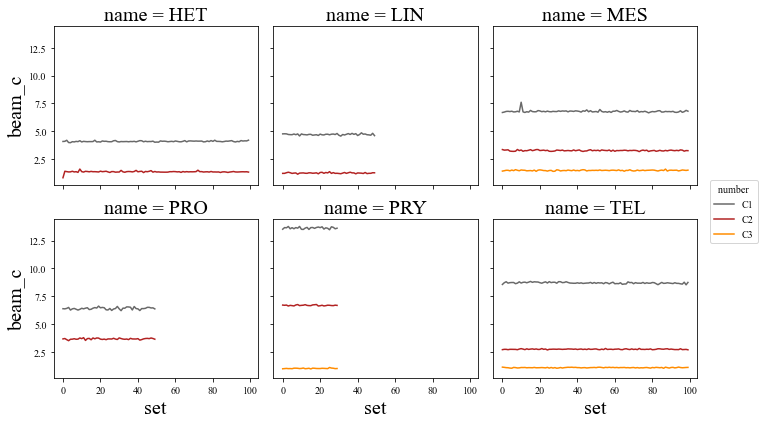

In [12]:
xarr.beam_c.sel(type='S',config=1).plot(col='name',hue='number',col_wrap=3)

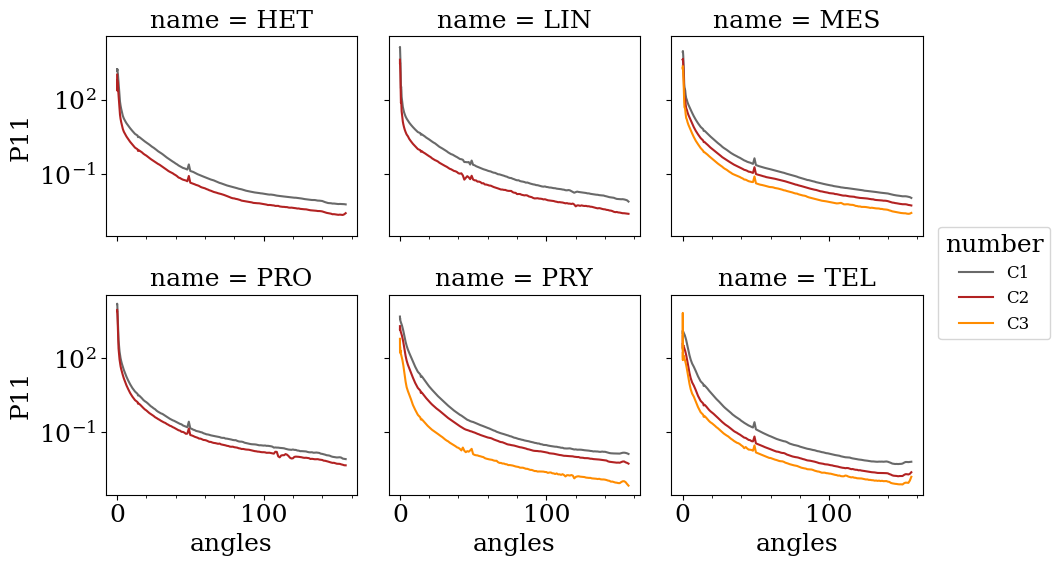

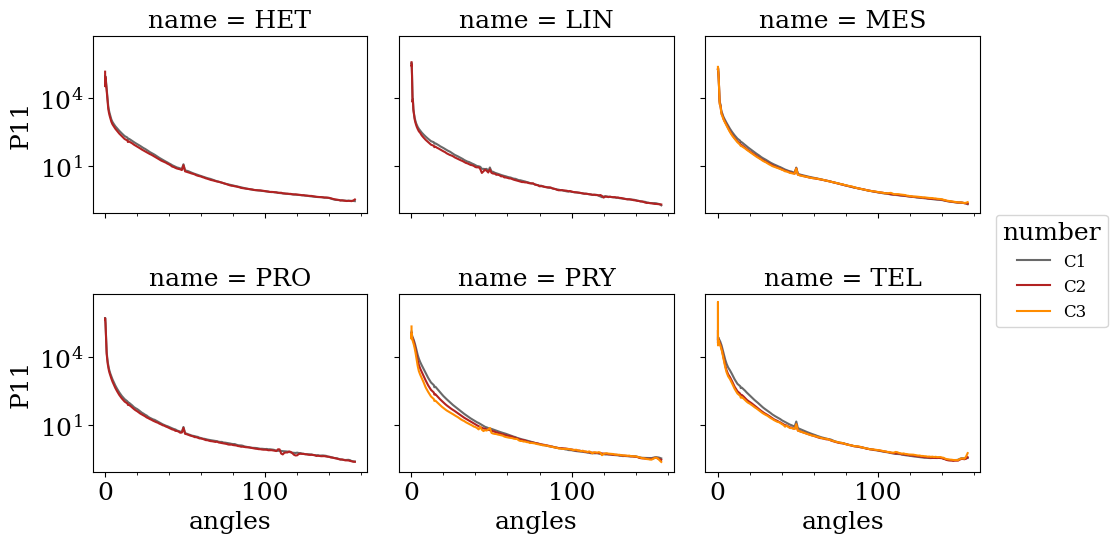

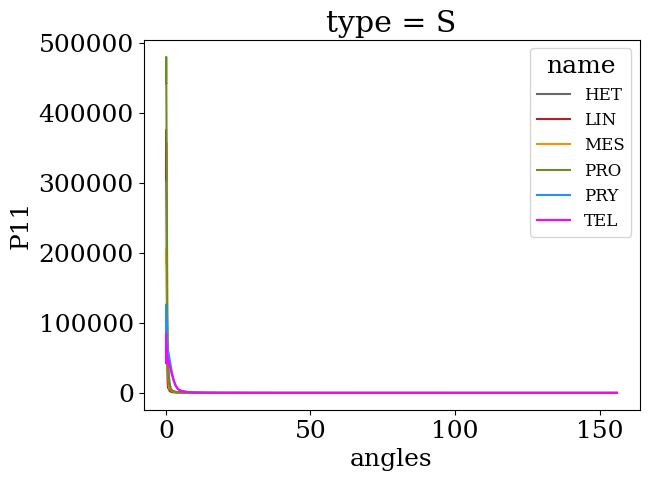

In [27]:

xmedian = xarr.median('set')
xnorm = xmedian.P11 / xmedian.P11.sel(angles=90,method='nearest')

xfinal = xr.Dataset({'p11':xnorm.median(dim='number'),
                     'p12':xmedian.p12.median(dim='number'),
                     'p22':xmedian.p22.median(dim='number')})

# plot b*P11
xmedian.P11.sel(type='S').plot(x='angles',col='name',col_wrap=3,hue='number')
plt.semilogy()
plt.minorticks_on()

# plot normalized P11

xnorm.sel(type='S').plot(x='angles',col='name',col_wrap=3,hue='number')
plt.semilogy()
plt.minorticks_on()

# plot all species median
plt.figure()
xnorm.median(dim='number').sel(type='S').plot(x='angles',hue='name')

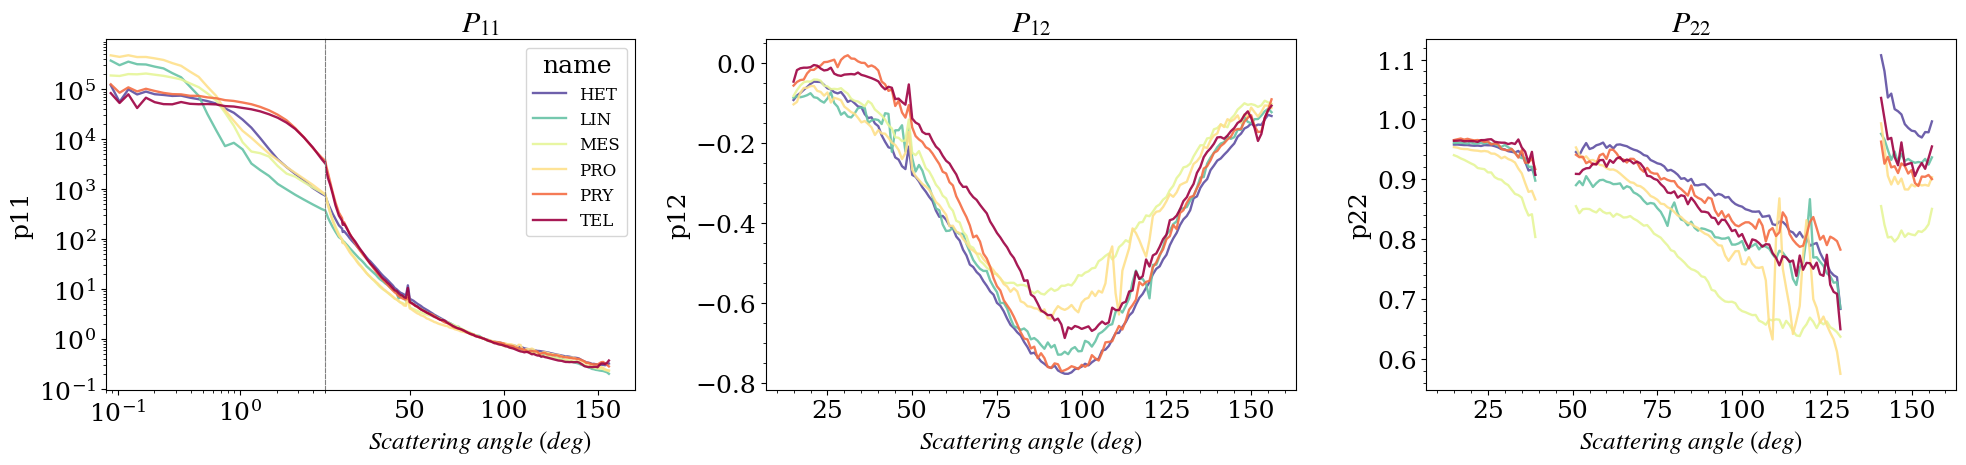

In [30]:
Nspecies=6
lw=1.7
alpha=0.9
type='S'
plt.rc('legend',fontsize=12)

xfinal_ =xfinal.sel(type=type)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 5), )
fig.subplots_adjust(bottom=0.15, top=0.8, left=0.1, right=0.975,
                    hspace=0.1, wspace=0.25)
axs = axs.ravel()
for ax in axs:
    ax.set_prop_cycle('color', plt.cm.Spectral_r(np.linspace(0, 1, Nspecies)))

ax = axs[0]
ax.loglog()
ax, axlin = utils.plot().semilog(ax, size=3.1)
axlin.set_prop_cycle('color', plt.cm.Spectral_r(np.linspace(0, 1, Nspecies)))
#for ax_ in (ax, axlin):
xfinal_.p11.plot(hue='name', alpha=alpha, lw=lw, add_legend=False, ax=ax)
xfinal_.p11.plot(hue='name', alpha=alpha, lw=lw, add_legend=True,ax=axlin)

xfinal_.p12.plot(hue='name', alpha=alpha, lw=lw, add_legend = False, ax=axs[1])
xfinal_.p22.plot(hue='name', alpha=alpha, lw=lw, add_legend=False, ax=axs[2])

axs[1].set_title('$P_{12}$')
axs[2].set_title('$P_{22}$')
for i in range(1, 3):
    axs[i].set_xlabel('$Scattering\ angle\ (deg)$')
    axs[i].minorticks_on()
# axlin.text(0.95, 0.95,
#            r'$c=${:6.3f}$\pm${:5.3f}'.format(c_median, c_std) + ' $m^{-1}$',
#            size=18, transform=axlin.transAxes, ha="right", va="top", )
axlin.xaxis.set_visible(True)
ax.set_xlabel('')
ax.set_title('')
axlin.set_xlabel('$Scattering\ angle\ (deg)$')
axlin.set_title('$P_{11}$')

#
# axs[1].legend(fontsize=14,loc= 'lower right',bbox_to_anchor=[1,1.05],
#            ncol=3, fancybox=True, framealpha=1,
#            shadow=True, borderpad=1)
#plt.show()
plt.tight_layout()
#plt.savefig(opj(idir,'..','fig','normalized_scat_mat.png'),dpi=300)

In [ ]:
plt.show()

In [6]:
idir = '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2'
files=glob.glob(opj(idir,'*.nc'))

In [7]:
files

['/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/CHA_F_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/LEP_S_C1_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/KAR_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/HEC_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/ALM_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/Saltwater_blank_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/BEADS3mic_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/EMI_S_C1_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/BEADS1mic_S_C1_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/CHA_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/MIC_M_C1_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/LEP_S_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/KAR_F_C2_scat_mat.nc',
 '/DATA/projet/gernez/hablab/2023/lisst-vsf/L2/EMI_S_C2_scat_mat.nc',
 

In [8]:
p=[]
for file in files:
    basename = os.path.basename(file)
    info = basename.split('_')
    if info[0].__contains__('MilliQ'):
        continue
    if info[0].__contains__('BEADS'):
        continue
    if info[1].__contains__('blank'):
        continue

    p.append(xr.open_dataset(file).drop('pmt').expand_dims(['name','type','number']).set_coords(['name','type','number']))


xarr = xr.combine_by_coords(p)

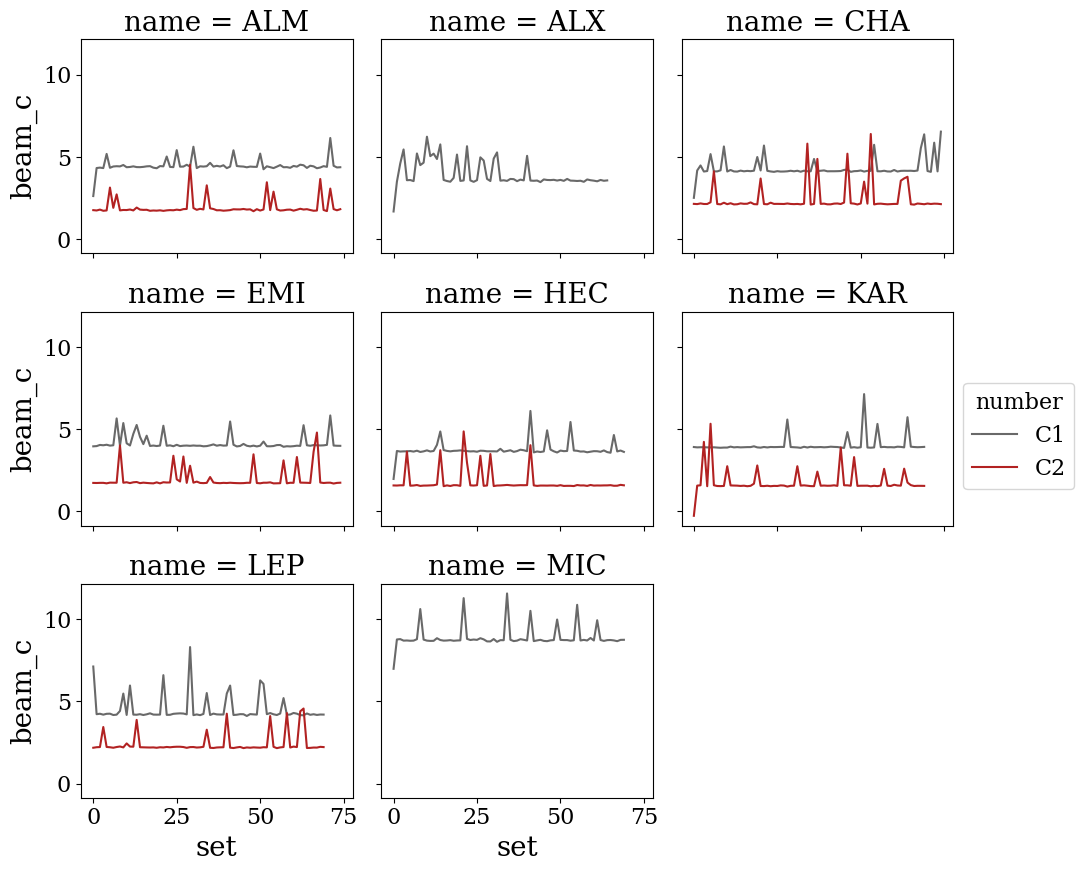

In [9]:
xarr.beam_c.sel(type='S',config=0).plot(col='name',hue='number',col_wrap=3)

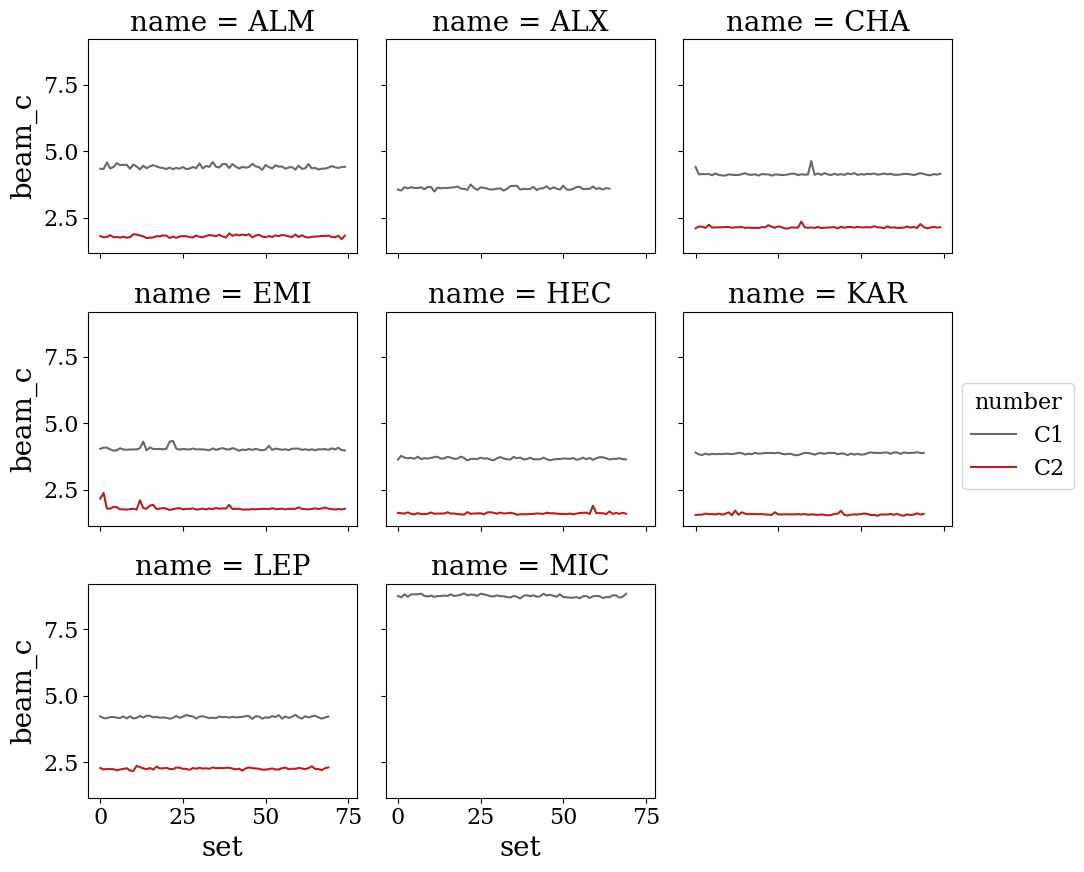

In [10]:
xarr.beam_c.sel(type='S',config=1).plot(col='name',hue='number',col_wrap=3)

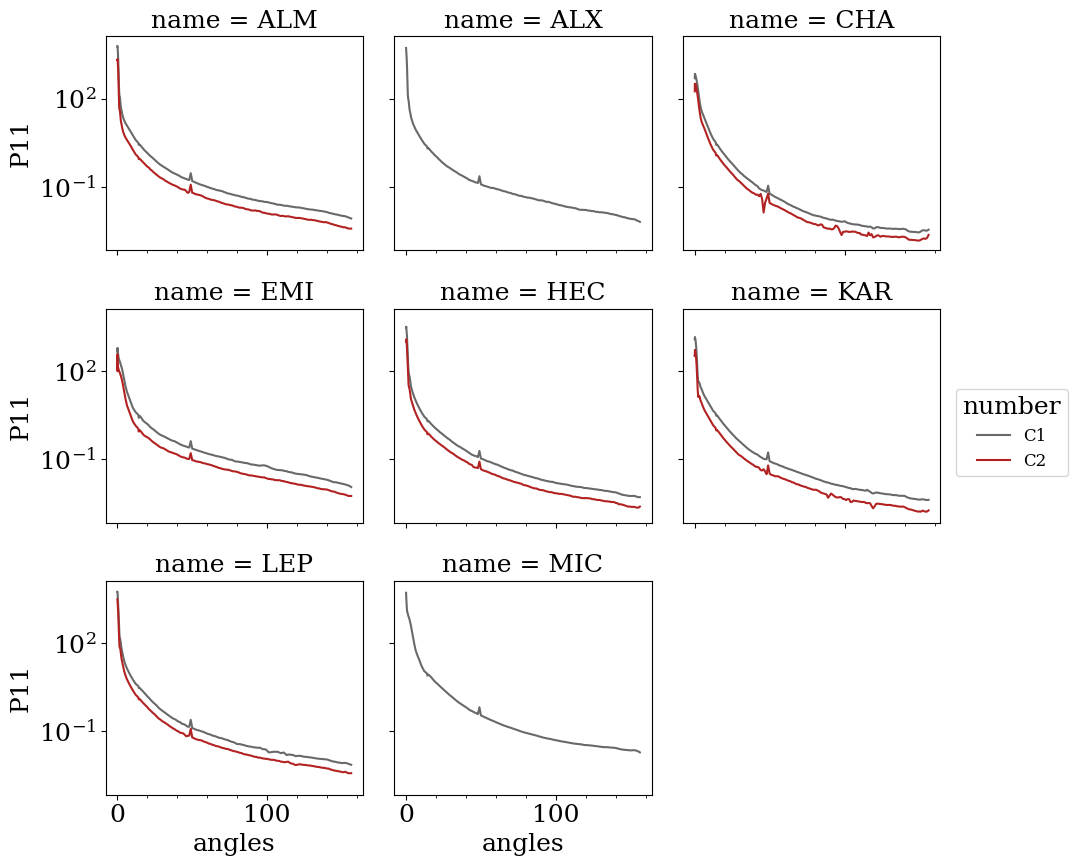

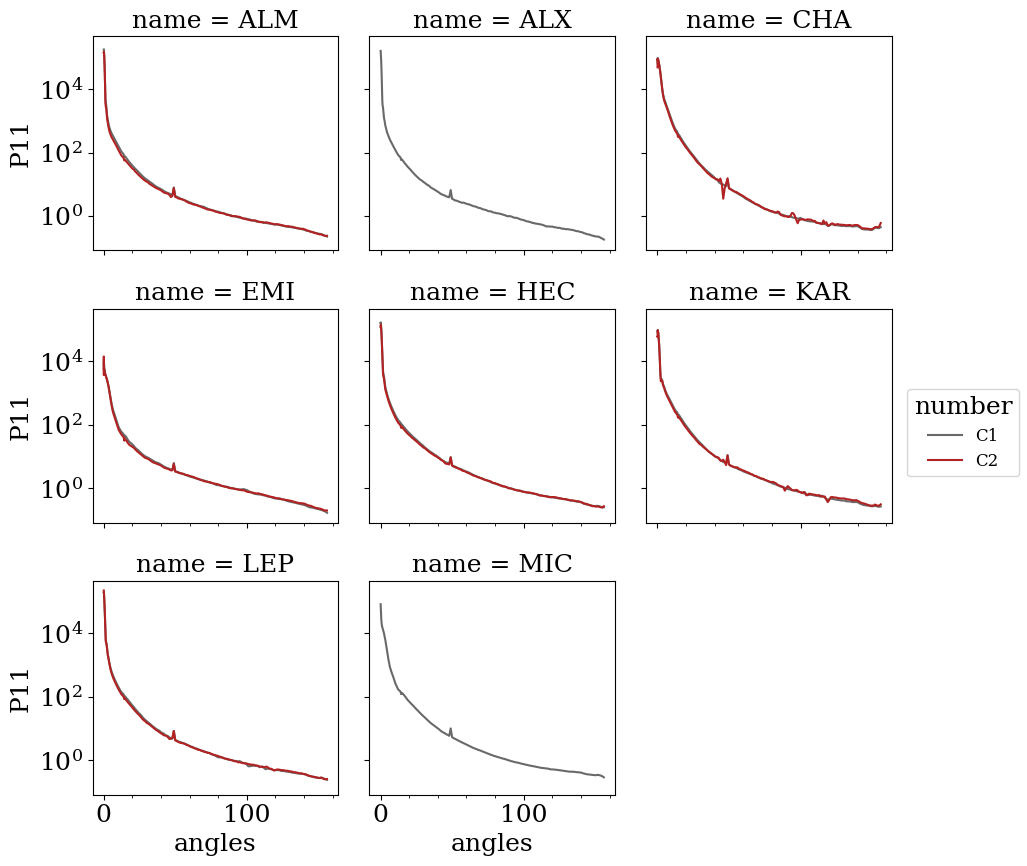

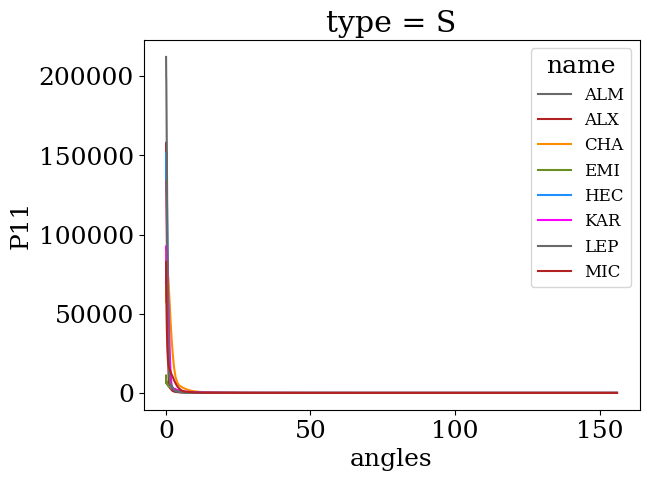

In [36]:
xmedian = xarr.median('set')
xnorm = xmedian.P11 / xmedian.P11.sel(angles=90,method='nearest')

xfinal = xr.Dataset({'p11':xnorm.median(dim='number'),
                     'p12':xmedian.p12.median(dim='number'),
                     'p22':xmedian.p22.median(dim='number')})

# plot b*P11
xmedian.P11.sel(type='S').plot(x='angles',col='name',col_wrap=3,hue='number')
plt.semilogy()
plt.minorticks_on()

# plot normalized P11

xnorm.sel(type='S').plot(x='angles',col='name',col_wrap=3,hue='number')
plt.semilogy()
plt.minorticks_on()

# plot all species median
plt.figure()
xnorm.median(dim='number').sel(type='S').plot(x='angles',hue='name')

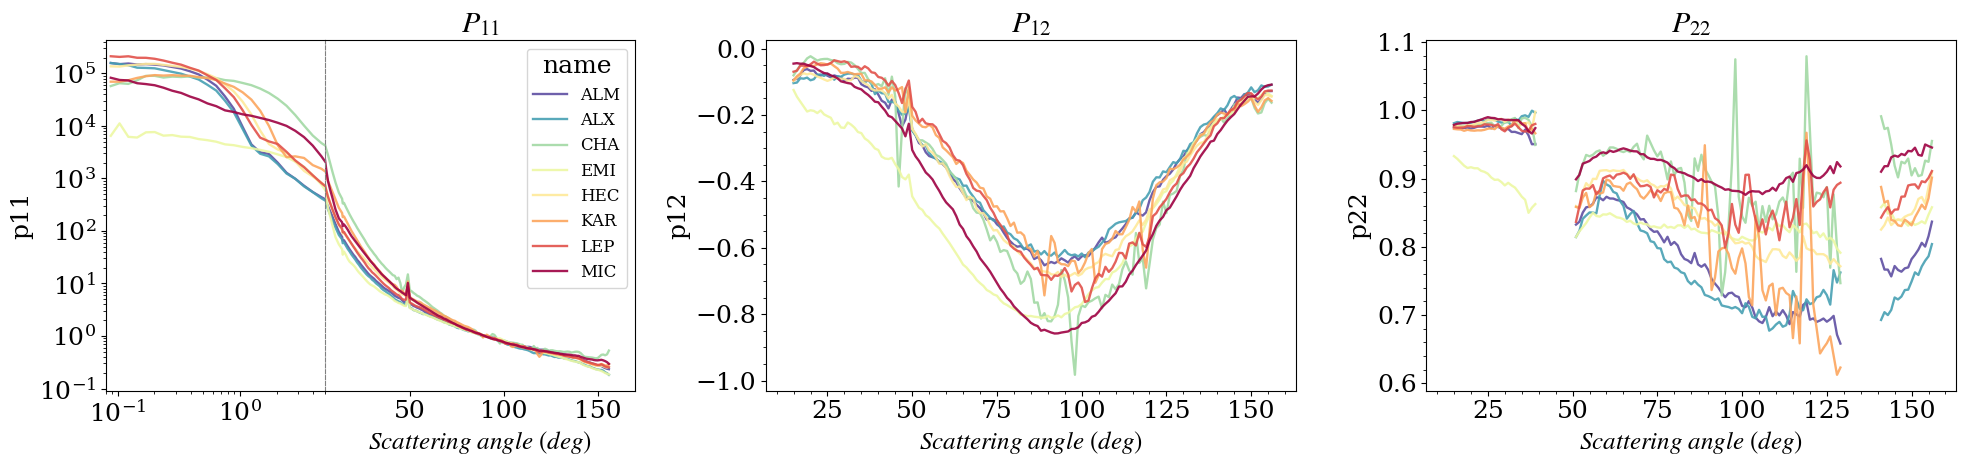

In [37]:
Nspecies=8
lw=1.7
alpha=0.9
type='S'
plt.rc('legend',fontsize=12)

xfinal_ =xfinal.sel(type=type)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(20, 5), )
fig.subplots_adjust(bottom=0.15, top=0.8, left=0.1, right=0.975,
                    hspace=0.1, wspace=0.25)
axs = axs.ravel()
for ax in axs:
    ax.set_prop_cycle('color', plt.cm.Spectral_r(np.linspace(0, 1, Nspecies)))

ax = axs[0]
ax.loglog()
ax, axlin = utils.plot().semilog(ax, size=3.1)
axlin.set_prop_cycle('color', plt.cm.Spectral_r(np.linspace(0, 1, Nspecies)))
#for ax_ in (ax, axlin):
xfinal_.p11.plot(hue='name', alpha=alpha, lw=lw, add_legend=False, ax=ax)
xfinal_.p11.plot(hue='name', alpha=alpha, lw=lw, add_legend=True,ax=axlin)

xfinal_.p12.plot(hue='name', alpha=alpha, lw=lw, add_legend = False, ax=axs[1])
xfinal_.p22.plot(hue='name', alpha=alpha, lw=lw, add_legend=False, ax=axs[2])

axs[1].set_title('$P_{12}$')
axs[2].set_title('$P_{22}$')
for i in range(1, 3):
    axs[i].set_xlabel('$Scattering\ angle\ (deg)$')
    axs[i].minorticks_on()
# axlin.text(0.95, 0.95,
#            r'$c=${:6.3f}$\pm${:5.3f}'.format(c_median, c_std) + ' $m^{-1}$',
#            size=18, transform=axlin.transAxes, ha="right", va="top", )
axlin.xaxis.set_visible(True)
ax.set_xlabel('')
ax.set_title('')
axlin.set_xlabel('$Scattering\ angle\ (deg)$')
axlin.set_title('$P_{11}$')

#
# axs[1].legend(fontsize=14,loc= 'lower right',bbox_to_anchor=[1,1.05],
#            ncol=3, fancybox=True, framealpha=1,
#            shadow=True, borderpad=1)
#plt.show()
plt.tight_layout()
#plt.savefig(opj(idir,'..','fig','normalized_scat_mat.png'),dpi=300)